   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
      

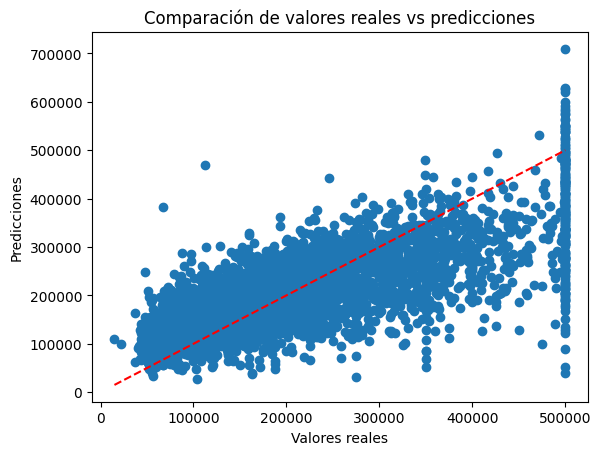

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
data = pd.read_csv(url)

# Ver las primeras filas del conjunto de datos
print(data.head())

# Imprimir los nombres de las columnas
print(data.columns)

# Filtrar datos, por ejemplo, eliminando filas con valores nulos
data = data.dropna()

# Seleccionar características (features) y variable objetivo (target)
X = data[['median_income', 'housing_median_age', 'total_rooms']]  # Ajusta según tus necesidades
y = data['median_house_value']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformar características para aplicar la regresión no lineal
poly = PolynomialFeatures(degree=2)  
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Crear el modelo de regresión
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_poly_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Gráfico de comparación entre valores reales y predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de valores reales vs predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()
